In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("data_source/factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
conn.cursor().execute(q).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [2]:
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
query2 = 'SELECT * FROM facts LIMIT 5'
pd.read_sql_query(query2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
query = 'SELECT MIN(population) min_population, MAX(population) max_population, MIN(population_growth) min_population_growth, MAX(population_growth) max_population_growth FROM facts'
pd.read_sql_query(query, conn)

,min_population,max_population,min_population_growth,max_population_growth
0,0,7256490011,0.0,4.02


In [5]:
query = 'SELECT * FROM facts WHERE population = 0'
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
query = '''SELECT * 
FROM facts 
WHERE population = (select max(population) from facts)'''
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Through the obsevation, Antarctica has 0 population and the world has a total of 7,256,490,011 people and is on a constant growth of 1.08 percent annually.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT MIN(population) from facts)
AND population != (SELECT MAX(population) from facts)
'''

data = pd.read_sql_query(q, conn)
data.head()

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49


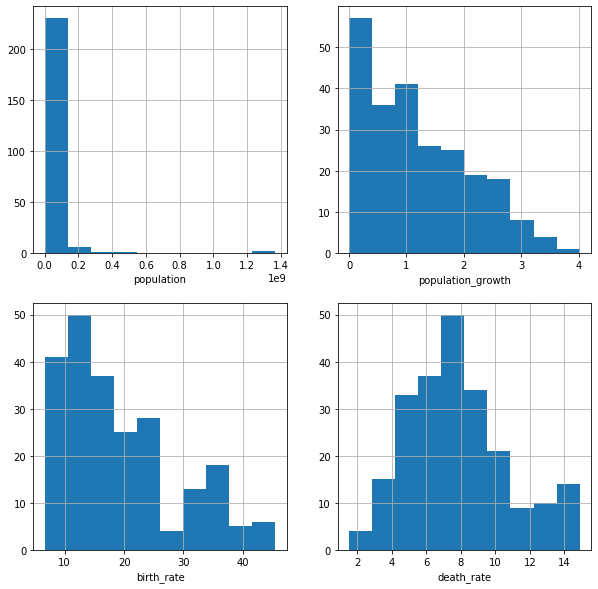

In [8]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

data["population"].hist(ax=ax1)
ax1.set_xlabel("population")
data["population_growth"].hist(ax=ax2)
ax2.set_xlabel("population_growth")
data["birth_rate"].hist(ax=ax3)
ax3.set_xlabel("birth_rate")
data["death_rate"].hist(ax=ax4)
ax4.set_xlabel("death_rate")

plt.show()

In [9]:
#Which countries have the highest population density?
q = '''
SELECT name, CAST(population as float)/CAST(area as float) density
FROM facts
WHERE population != (SELECT MIN(population) from facts)
AND population != (SELECT MAX(population) from facts)
ORDER BY density DESC
'''

data = pd.read_sql_query(q, conn)
data.head(10)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


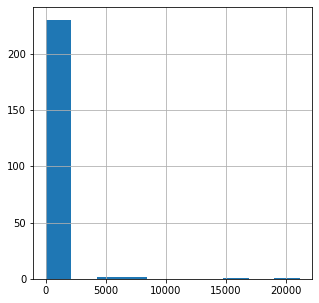

In [10]:
fig = plt.figure(figsize=(5,5))
data['density'].hist()

plt.show()